###  multiple Regration  --- multiple input value 

### import libreary

In [11]:
pip install word2number

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5690 sha256=4b00590888d4c43fbe113ec93349cd43522838db6d809bb147b685f640a1610d
  Stored in directory: c:\users\rajus\appdata\local\pip\cache\wheels\53\b6\a3\32e61ad7462806c9f50279960156751ff653bb10034f01a86f
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from word2number import w2n

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### Read data 

In [65]:
data = pd.read_csv("hiring.csv")
data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [66]:
data.columns


Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [67]:

data.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [68]:
data.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

### Check data null or not 

In [69]:
data.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

####  fill the test_score(out of 10)

In [70]:
m = data['test_score(out of 10)'].mean()
data['test_score(out of 10)' ] = data['test_score(out of 10)'].fillna(m)

In [71]:
data['test_score(out of 10)']

0     8.000000
1     8.000000
2     6.000000
3    10.000000
4     9.000000
5     7.000000
6     7.857143
7     7.000000
Name: test_score(out of 10), dtype: float64

In [72]:
data.experience.fillna("zero",inplace=True)

In [73]:
data['experience']

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [74]:
data.experience = data.experience.apply((w2n.word_to_num))

In [75]:
X = data.drop(columns=['salary($)'])

X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [76]:
 y = data['salary($)']
 y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [77]:
lr = LinearRegression()
lr.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [79]:
predected_salary = lr.predict(X)
predected_salary

array([52313.61238494, 45722.68644263, 58231.95591138, 63991.7318464 ,
       67429.06277517, 61080.55179794, 75922.72532666, 79307.67351488])

In [81]:
data['predected_salary'] = predected_salary

In [82]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($),predected_salary
0,0,8.000000,9,50000,52313.612385
1,0,8.000000,6,45000,45722.686443
2,5,6.000000,7,60000,58231.955911
3,2,10.000000,10,65000,63991.731846
4,7,9.000000,6,70000,67429.062775
5,3,7.000000,10,62000,61080.551798
6,10,7.857143,7,72000,75922.725327
7,11,7.000000,8,80000,79307.673515


### Test the model

In [87]:
exp = float(input("Enter Exp: "))
t_score = float(input("Enter Test Score: "))
i_score = float(input("Enter Interview Score: "))

# Pass the correct variables: exp, t_score, and i_score
user_pred = lr.predict([[exp, t_score, i_score]])

# Correct use of the round() function
print("Predicted_salary $: ", round(user_pred[0], 2))


Enter Exp:  2.5
Enter Test Score:  2.5
Enter Interview Score:  2.5


Predicted_salary $:  34581.2


C:\Users\rajus\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


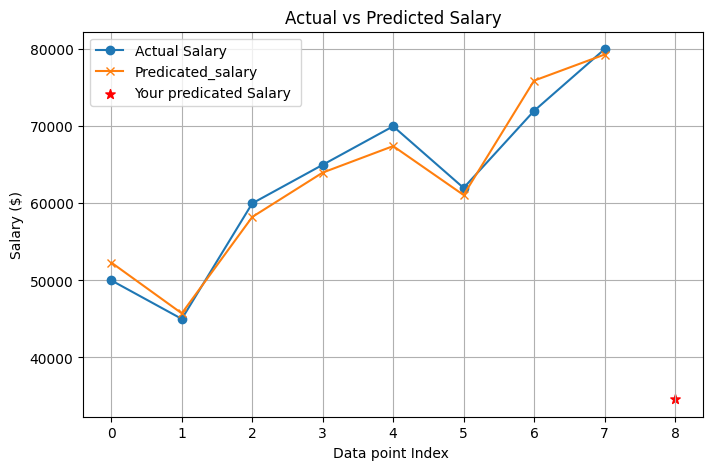

In [90]:
plt.figure(figsize=(8,5))
plt.plot(data.index,y,label= "Actual Salary",marker = "o")
plt.plot(data.index,predected_salary,label= "Predicated_salary",marker = "x")

plt.scatter(len(data),user_pred ,color = "red" ,label = "Your predicated Salary " ,s = 50,marker = "*")

plt.xlabel("Data point Index ")
plt.ylabel("Salary ($)")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.grid()
plt.show()